# Truth Discovery example

## Continuous Versions

### DF-QuAD

In [ ]:
import sys
sys.path.append("../")

from BAG import BAG

from semantics import QuadraticEnergyModel
from algorithms import RK4

from plotting import strengthplot

class ProductAggregation_ws:
    def __init__(self) -> None:
        pass

    def aggregate_strength(self, attackers, supporters, state):
        support_value = 1
        for a in attackers:
            support_value *= 1-state[a]

        attack_value = 1
        for s in supporters:
            attack_value *= 1-state[s]

        return support_value - attack_value

    def __str__(self) -> str:
        return __class__.__name__

ContinuousModularModel, RK4
Time: 9.89999999999998
Argument(name=s1, weight=0.5, strength=0.9999118366275332)
Argument(name=s2, weight=0.5, strength=0.9999118366275332)
Argument(name=s3, weight=0.5, strength=0.998887713004957)
Argument(name=s4, weight=0.5, strength=0.998887713004957)
Argument(name=y58, weight=0.0, strength=0.9995751937627928)
Argument(name=y62, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pb, weight=0.0, strength=4.1288298317965045e-05)
Argument(name=pl, weight=0.0, strength=0.9995751937627928)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

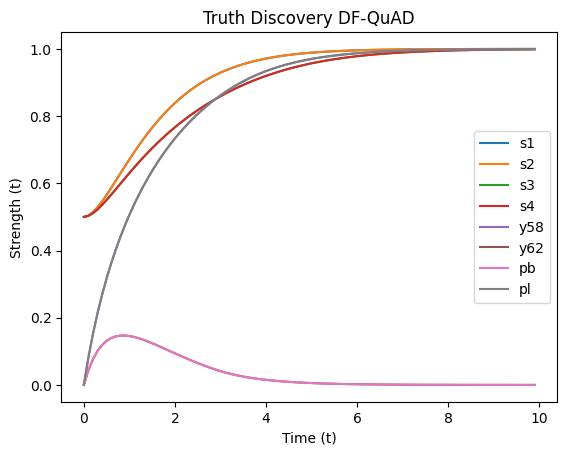

In [9]:
from semantics import modular
from semantics.ContinuousModularModel import ContinuousModularModel
# Iterative computation
model = ContinuousModularModel(ProductAggregation_ws(),  modular.LinearInfluence(conservativeness=1))
model.BAG = BAG("truth_disco.bag")
model.approximator = RK4(model)

DELTA = 10e-2
EPSILON = 10e-4
model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)

# for arg in model.BAG.arguments.values():
#     print((arg.name,arg.strength))

strengthplot(model, DELTA, EPSILON, "Truth Discovery DF-QuAD")

### Quadratic Energy

QuadraticEnergyModel, RK4
Time: 8.899999999999984
Argument(name=s1, weight=0.5, strength=0.8721688605431386)
Argument(name=s2, weight=0.5, strength=0.8721688605431386)
Argument(name=s3, weight=0.5, strength=0.7107620242585438)
Argument(name=s4, weight=0.5, strength=0.7107620242585438)
Argument(name=y58, weight=0.0, strength=0.8567572483683447)
Argument(name=y62, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pb, weight=0.0, strength=1.3518439360774931e-05)
Argument(name=pl, weight=0.0, strength=0.8567572483683447)



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

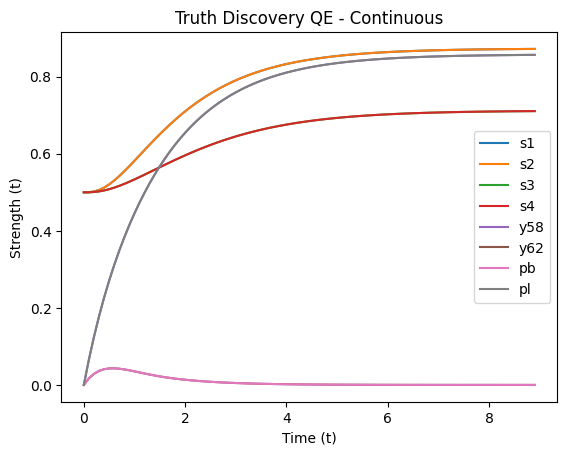

In [10]:
#from uncertainpy.argumentation.graphing import graph

model = QuadraticEnergyModel()
model.approximator = RK4(model)
model.BAG = BAG("truth_disco.bag")

DELTA = 10e-2
EPSILON = 10e-4

model.solve(delta=DELTA, epsilon=EPSILON, verbose=True, generate_plot=True)
strengthplot(model, DELTA, EPSILON, "Truth Discovery QE - Continuous")

## Discrete Versions

### Df-QuAD

Creting BSAF: Extracting relations from arguments...

Discrete modular, iterations:  20 
-------
Aggregation:  ProductAggregation
Influence:  LinearInfluence
Set Aggregation:  SetSumAggregation
-------



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

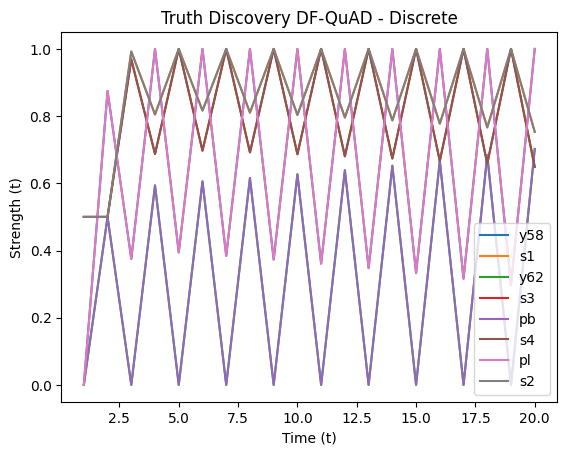

In [1]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from BSAF import BSAF
from BSAF.Argument import Argument
from ABAF.Assumption import Assumption
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation



bag = BAG("truth_disco.bag")


### Create the BSAF from the BAG

## define assumptions from the arguments keys and initial strengths
assumptions = [Assumption(arg) for arg in bag.arguments]

## retrieve the initial strengths from the arguments
for asm in assumptions:
    asm.initial_weight = bag.arguments[asm.name].strength

bsaf_args = [Argument(name=arg) for arg in bag.arguments]
for arg in bsaf_args:
    ## set the initial strength of the argument
    arg.initial_weight = bag.arguments[arg.name].strength

### Define the BSAF
bsaf = BSAF(bsaf_args, assumptions)

for sup in bag.supports:
    ## check that the support is coming from only one assumption
    if sup.supporter.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        suptr = [arg for arg in bsaf.arguments if arg.name == sup.supporter.name]
        suptd = [arg for arg in bsaf.arguments if arg.name == sup.supported.name][0]
        ## add the support to the BSAF
        bsaf.add_support(suptr, suptd)
        # print(f"Support from {suptd.name} to {suptr[0].name}")
    else:
        print("Support is not coming from only one assumption")

for att in bag.attacks:
    ## check that the attack is coming from only one assumption
    if att.attacker.name in [asm.name for asm in assumptions]:
        ## get the argument from the BSAF
        attr = [arg for arg in bsaf.arguments if arg.name == att.attacker.name]
        attd = [arg for arg in bsaf.arguments if arg.name == att.attacked.name][0]
        ## add the attack to the BSAF
        bsaf.add_attack(attr, attd)
        # print(f"Attack from {attd.name} to {attr[0].name}")
    else:
        print("Attack is not coming from only one assumption")


model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model.solve(20, generate_plot=True)

strengthplot(model, 1, 1, "Truth Discovery DF-QuAD - Discrete")

### Does it converge if we consider acyclic frameworks?

## Flat ABA - should converge all
## Convergence of random instances 
## How many outer loops until we get stuck in the inner loop?


### QE


Discrete modular, iterations:  10 
-------
Aggregation:  SumAggregation
Influence:  QuadraticMaximumInfluence
Set Aggregation:  SetSumAggregation
-------



<module 'matplotlib.pyplot' from 'c:\\Users\\fabri\\Documents\\envs\\gradaba\\Lib\\site-packages\\matplotlib\\pyplot.py'>

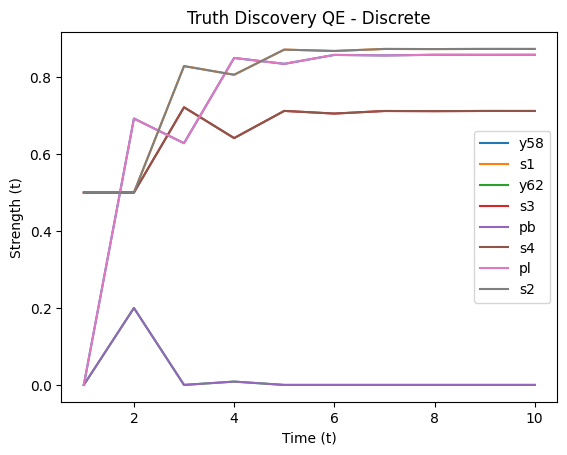

In [2]:
# print(bsaf)

from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetSumAggregation())

model2.solve(10, generate_plot=True)

strengthplot(model2, 1, 1, "Truth Discovery QE - Discrete")

# Random ICCMA example

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7], Rules=[r1[0.5]: s8 :- a6, a0, a1.,r2[0.5]: s8 :- a1.,r3[0.5]: s8 :- a5, a1, a3.,r4[0.5]: s8 :- a5, a3.,r5[0.5]: s7 :- a0.,r6[0.5]: s12 :- a5, a6, a3.,r7[0.5]: s12 :- a1, a7, a4, a6, a2.,r8[0.5]: s12 :- a0, s7, a1, a6, a2.,r9[0.5]: s3 :- a4.,r10[0.5]: s3 :- a1.,r11[0.5]: s3 :- a2, a0, a1.,r12[0.5]: s5 :- a3.,r13[0.5]: s5 :- a0, s7, a1, a7, a3.,r14[0.5]: s16 :- a5, a0, s7, a3.,r15[0.5]: s16 :- a2, a5, s7, a7.,r16[0.5]: s16 :- s12, s5.,r17[0.5]: s14 :- a7.,r18[0.5]: s6 :- a5, s16.,r19[0.5]: s6 :- a5, a0, s8, a7, s16.,r20[0.5]: s11 :- s6, a7, s7, a6.,r21[0.5]: s11 :- a5.,r22[0.5]: s11 :- s3, s16.,r23[0.5]: s2 :- a1, s8.,r24[0.5]: s2 :- s12, a4.,r25[0.5]: s2 :- a7, s12, a0, a1.,r26[0.5]: s2 :- a5, a3, a0, s14, s5.,r27[0.5]: s10 :- s12, a0, a4, a3.,r28[0.5]: s10 :- s6, a0.,r29[0.5]: s10 :- a5, s12.,r30[0.5]: s10 :- a7, s14, a4, s16, a3.,r31[0.5]: s10 :- a7.,r32[0.5]: s4 :- s6.,r33[0.5]: s4 :- s16.,r34[0.5]: s0 :- a0, a6.,r35[0.5]: s0 :- s12.,r36[0.

Analysing rules: 100%|██████████| 50/50 [00:00<00:00, 1608.63it/s]


0.22s to build 547 arguments

Support: {a0} -> a0 
Support: {a2,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6} -> a1 
Support: {a0,a1,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a3,a5,a6,a7} -> a1 
Support: {a0,a2,a3,a6} -> a1 
Support: {a1,a2,a3,a4,a6,a7} -> a1 
Support: {a1,a3,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a6,a7} -> a1 
Support: {a0,a2,a4,a5,a6,a7} -> a1 
Support: {a2,a3,a4,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a6,a7} -> a1 
Support: {a3,a5,a6} -> a1 
Support: {a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a5,a7} -> a1 
Support: {a0,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a7} -> a1 
Support: {a0,a1,a2,a3,a5,a7} -> a1 
Support: {a0,a2,a3,a5,a7} -> a1 
Support: {a0,a1,a2,a5,a7} -> a1 
Support: {a0,a2,a3,a4,a6,a7} -> a1 
Support: {a0,a2,a5,a7} -> a1 
Support: {a0,a1,a2,a5,a6,a7} -> a1 
Support: {a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a2,a5,a6,a7} -> a1 
Support: {a0,a1,a3,a5,a7} -> a1 
Support: {a2,a3,a6} -> a1 
Support: {a0,a1,a2,a4,a5,a6,a7} -> a1 
Support: {a0,a3,a5,

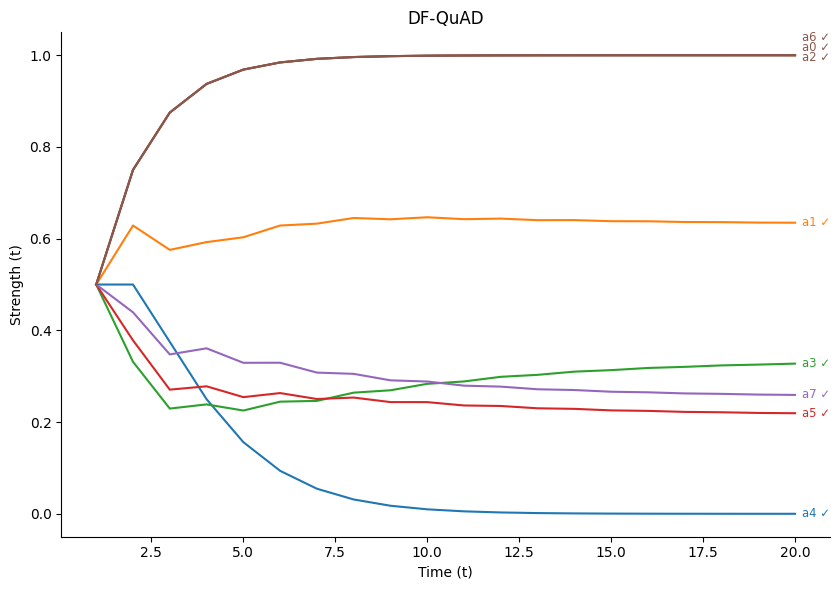

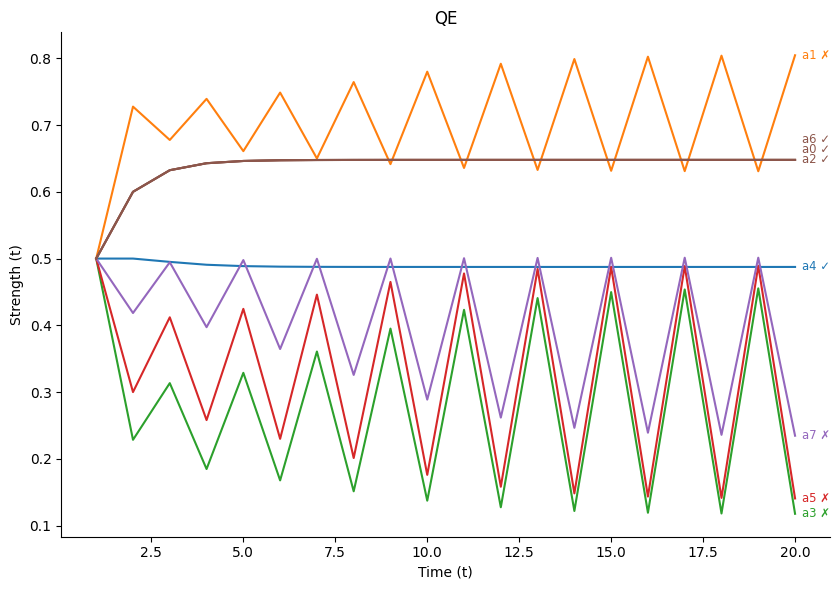

In [7]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence


## Load ICCMA example
abaf = ABAF(path="/vol/bitbucket/fr920/dependency-graph-alternative/input_data_nf/non_flat_1_s25_c0.02_n0.2_a0.3_r5_b5_1.aba")
# abaf = ABAF(path="ABA_ICCMA_input.iccma")

DELTA = 5
EPSILON = 1e-2

print(abaf)

print(f"Number of Assumptions: {len(abaf.assumptions)}")
print(f"Number of Rules: {len(abaf.rules)}")

bsaf = abaf.to_bsaf()

print(bsaf)

model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                        influence=LinearInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model.solve(20, generate_plot=True, verbose=True)

strengthplot(model, delta=DELTA, epsilon=EPSILON,
             title="DF-QuAD", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model.has_converged(epsilon=1e-2, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                        influence=QuadraticMaximumInfluence(conservativeness=1), 
                        set_aggregation=SetProductAggregation())

model2.solve(20, generate_plot=True, verbose=True)

strengthplot(model2, delta=DELTA, epsilon=EPSILON,
             title="QE", wide=10, tall=6)

# check convergence over the last 5 iterations, with ε=1e-3
per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
print(per_arg)  
# e.g. {'a0': True, 'a1': False, ...}

if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
    print("All assumptions have stabilized in the last 5 steps.")
else:
    print("Some are still oscillating or drifting.")


### Check For Convergence

In [8]:
import pickle
from collections import defaultdict

# load your full results list
with open("../convergence_results.pkl","rb") as pf:
    all_runs = pickle.load(pf)

# filter out timed-out runs
good_runs = [r for r in all_runs if not r["timeout"]]

# bucket by model
by_model = defaultdict(list)
for r in good_runs:
    by_model[r["model"]].append(r)

print(f"Total non-timeout runs: {len(good_runs)} / {len(all_runs)}\n")

for model, runs in by_model.items():
    N = len(runs)
    # global convergence count
    num_glob = sum(1 for r in runs if r["global_converged"])
    # average proportion converged
    avg_prop = sum(r["prop_converged"] for r in runs) / N if N else 0
    print(f"Model {model}:")
    print(f"  Runs:                {N}")
    print(f"  Global converged:    {num_glob} ({num_glob/N:.1%})")
    print(f"  Avg. prop_converged: {avg_prop:.2f}")
    print()


Total non-timeout runs: 94 / 320

Model DF-QuAD:
  Runs:                47
  Global converged:    18 (38.3%)
  Avg. prop_converged: 0.81

Model QE:
  Runs:                47
  Global converged:    37 (78.7%)
  Avg. prop_converged: 0.87



In [25]:
import pickle
from collections import defaultdict

# 1) load all runs
with open("../convergence_results_to10m.pkl","rb") as pf:
    all_runs = pickle.load(pf)

# 2) keep only the ones that finished (no timeout)
good = [r for r in all_runs if not r["timeout"]]

# 3) bucket by (model, is_flat)
buckets = defaultdict(list)
for r in good:
    # assume each entry has r["is_flat"] == True/False
    key = (r["model"], r.get("non_flat"))
    buckets[key].append(r)

# 4) print summary
print(f"Total non-timeout runs: {len(good)} / {len(all_runs)}\n")

for (model, non_flat), runs in sorted(buckets.items()):
    N = len(runs)
    glob_conv = sum(1 for r in runs if r["global_converged"])
    avg_prop  = sum(r["prop_converged"] for r in runs) / N if N else 0
    flat_tag  = "Non-Flat" if non_flat else "Flat"
    print(f"{model:>6s} | {flat_tag:>9s} :")
    print(f"    Runs:             {N}")
    print(f"    Global converged: {glob_conv} ({glob_conv/N:.1%})")
    print(f"    Avg prop_conv:    {avg_prop:.2f}\n")


Total non-timeout runs: 104 / 320

DF-QuAD |  Non-Flat :
    Runs:             52
    Global converged: 24 (46.2%)
    Avg prop_conv:    0.83

    QE |  Non-Flat :
    Runs:             52
    Global converged: 39 (75.0%)
    Avg prop_conv:    0.87



In [24]:
import pickle

from pathlib import Path

# Define the folder path
folder_path = Path("../data_generation/abaf/")

# Count the number of files in the folder
file_count = len(list(folder_path.glob("*")))
print(f"Number of files in the folder: {file_count}")

# load your results list
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl", "rb") as pf:
    runs = pickle.load(pf)

total = len(runs)
flat_runs     = [r for r in runs if not r.get("non_flat")]
nonflat_runs  = [r for r in runs if r.get("non_flat")]

unique_flat_files = {r["file"] for r in flat_runs}
unique_nonflat_files = {r["file"] for r in nonflat_runs}
print(f"Unique flat files: {len(unique_flat_files)}")
print(f"Unique non-flat files: {len(unique_nonflat_files)}")
print(f"Total files: {len(unique_flat_files) + len(unique_nonflat_files)}")

def pct(part, whole):
    return f"{100*len(part)/whole:.1f}%" if whole else "N/A"

print(f"Total runs:        {total}")
print(f"  Flat runs:       {len(flat_runs)} ({pct(flat_runs, total)})")
print(f"  Non-flat runs:   {len(nonflat_runs)} ({pct(nonflat_runs, total)})")

def breakdown(lst):
    done = sum(1 for r in lst if not r["timeout"])
    to   = sum(1 for r in lst if r["timeout"])
    return done, to

done_f, to_f     = breakdown(flat_runs)
done_nf, to_nf   = breakdown(nonflat_runs)

print("\nOutcome by flatness:")
print(f" Flat:     completed={done_f} ({pct([r for r in flat_runs if not r['timeout']], len(flat_runs))}), "
      f"timeouts={to_f} ({pct([r for r in flat_runs if r['timeout']], len(flat_runs))})")
print(f" Non-flat: completed={done_nf} ({pct([r for r in nonflat_runs if not r['timeout']], len(nonflat_runs))}), "
      f"timeouts={to_nf} ({pct([r for r in nonflat_runs if r['timeout']], len(nonflat_runs))})")



Number of files in the folder: 1441
Unique flat files: 480
Unique non-flat files: 954
Total files: 1434
Total runs:        2868
  Flat runs:       960 (33.5%)
  Non-flat runs:   1908 (66.5%)

Outcome by flatness:
 Flat:     completed=960 (100.0%), timeouts=0 (0.0%)
 Non-flat: completed=1736 (91.0%), timeouts=172 (9.0%)


In [23]:
import pickle
import pandas as pd

# 1) Load your previously‐computed results
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl", "rb") as pf:
    runs = pickle.load(pf)
# count total number of runs and files
print(f"Total runs: {len(runs)}")
print(f"Total files ran: {len(set(r['file'] for r in runs))}")
# 2) Identify flat runs correctly
# filter runs whose 'non_flat' flag is False (or missing)
flat_runs = [r for r in runs if not r.get('non_flat')]
nonflat_runs = [r for r in runs if r.get('non_flat')]
# count how many unique flat files
unique_flat_files = set(r['file'] for r in flat_runs)
print(f"Flat files: {len(unique_flat_files)} unique — total flat runs: {len(flat_runs)} (two models per file)")
# count how many unique non-flat files
unique_nonflat_files = set(r['file'] for r in nonflat_runs)
print(f"Non-flat files: {len(unique_nonflat_files)} unique — total non-flat runs: {len(nonflat_runs)} (two models per file)")


def summarize(df_in, name):
    """
    Print stats for completed vs timed-out runs separately.
    """
    # Build DataFrame with relevant columns
    cols = ["s", "n", "r", "b", "timeout"]
    df = pd.DataFrame(df_in)
    df = df[[c for c in cols if c in df.columns]]

    # split
    done = df[df["timeout"] == False] if "timeout" in df.columns else df
    timed = df[df["timeout"] == True] if "timeout" in df.columns else df.iloc[0:0]

    def print_stats(subset, label):
        print(f"--- {label} (count={len(subset)}) ---")
        for col in ["s", "n", "r", "b"]:
            if col not in subset.columns or subset[col].dropna().empty:
                continue
            vals = subset[col].dropna().astype(float)
            print(
                f"{col:>6s}: "
                f"min={vals.min()}, max={vals.max()}, "
                f"mean={vals.mean():.1f}, median={vals.median():.1f}"
            )
    # print in order: completed first, then timed out
    print_stats(done,  f"{name} — Completed")
    print_stats(timed, f"{name} — Timed out")

# 6) Print summaries
print("=== Flat runs ===")
print(f"Total flat runs: {len(flat_runs)}")
summarize(flat_runs, "Flat runs")

print("=== Non-flat runs ===")
print(f"Total non-flat runs: {len(nonflat_runs)}")
summarize(nonflat_runs,   "Non-flat runs")

# 7) Sanity checks: all flat should complete, all non-flat should timeout
flat_done = [r for r in flat_runs if not r.get("timeout", False)]
flat_to   = [r for r in flat_runs if     r.get("timeout", False)]
nonflat_done = [r for r in nonflat_runs if not r.get("timeout", False)]
nonflat_to   = [r for r in nonflat_runs if     r.get("timeout", False)]

print("=== Sanity checks ===")
print(f"All flat timed out?       {len(flat_to)==len(flat_runs)} (completed: {len(flat_done)}, timeouts: {len(flat_to)})")
print(f"All non-flat completed?   {len(nonflat_done)==len(nonflat_runs)} (completed: {len(nonflat_done)}, timeouts: {len(nonflat_to)})")


Total runs: 2868
Total files ran: 1434
Flat files: 480 unique — total flat runs: 960 (two models per file)
Non-flat files: 954 unique — total non-flat runs: 1908 (two models per file)
=== Flat runs ===
Total flat runs: 960
--- Flat runs — Completed (count=960) ---
     s: min=20.0, max=60.0, mean=35.0, median=30.0
     n: min=0.01, max=0.05, mean=0.0, median=0.0
     r: min=2.0, max=8.0, mean=4.7, median=4.0
     b: min=2.0, max=16.0, mean=7.5, median=6.0
--- Flat runs — Timed out (count=0) ---
=== Non-flat runs ===
Total non-flat runs: 1908
--- Non-flat runs — Completed (count=1736) ---
     s: min=20.0, max=60.0, mean=41.3, median=40.0
     n: min=0.05, max=0.2, mean=0.1, median=0.1
     r: min=2.0, max=8.0, mean=4.5, median=4.0
     b: min=2.0, max=16.0, mean=7.1, median=4.0
--- Non-flat runs — Timed out (count=172) ---
     s: min=40.0, max=60.0, mean=53.5, median=60.0
     n: min=0.1, max=0.2, mean=0.2, median=0.2
     r: min=2.0, max=8.0, mean=6.3, median=8.0
     b: min=2.0, max

In [ ]:
import pickle
from collections import Counter

# 1) Load the results list
with open("../convergence_results_to10m_nf_atm.pkl", "rb") as pf:
    results = pickle.load(pf)

# 2) Build a counter over (file, model) pairs
pair_counts = Counter((r["file"], r["model"]) for r in results)

# 3) Find duplicates (count > 1)
dups = {pair: cnt for pair, cnt in pair_counts.items() if cnt > 1}

# 4) Report
if not dups:
    print("✅ No duplicate (file,model) entries found.")
else:
    print("⚠️  Found duplicates for these (file, model) keys:")
    for (fname, model), cnt in sorted(dups.items()):
        print(f"  {fname!r}, {model!r} appears {cnt} times")

# 5) (Optional) filter out duplicates and rebuild a deduped list
deduped = []
seen = set()
for r in results:
    key = (r["file"], r["model"])
    if key not in seen:
        deduped.append(r)
        seen.add(key)

print(f"\ncacheinal runs: {len(results)}, deduped runs: {len(deduped)}")


✅ No duplicate (file,model) entries found.

Original runs: 2870, deduped runs: 2870


In [120]:
from pathlib import Path
import re

# 1) Point to your aba folder and gather all file paths
folder_path = Path("../data_generation/abaf/")
aba_files = sorted(folder_path.glob("*.aba"))
print(f"Total ABAF files in folder: {len(aba_files)}")

# 2) We’ll parse each .aba using its native format: lines starting with "a ", "c ", "r "
#    - "a X"  declares assumption X
#    - "r <idx> H B1 B2 ..." declares a rule with head H and body B1,B2,...
flat_files = []
nonflat_files = []
# 3) For each file, check flatness using the ABAF loader format
for path in aba_files:
    lines = path.read_text().splitlines()
    # collect assumption names
    assumptions = {parts[1] for line in lines if line.startswith("a ")
                   for parts in [line.split()]}

    # detect any rule whose head is an assumption
    nonflat = False
    nonflat_rule = 0
    for line in lines:
        if not line.startswith("r "):  # skip non-rule lines
            continue
        parts = line.split()
        # parts[0] == 'r', parts[1] == rule-id, so head is parts[2]
        if len(parts) < 2:
            continue
        head = parts[1]
        if head in assumptions:
            nonflat = True
            nonflat_rule += 1

    if nonflat:
        nonflat_files.append((path.name,nonflat_rule))
    else:
        flat_files.append((path.name,nonflat_rule))

# 4) Print proportions
total = len(aba_files)
f = len(flat_files)
nf = len(nonflat_files)
avg_nf_rule = sum(nf for _,nf in nonflat_files) / len(nonflat_files) if nonflat_files else 0
## sanity check
avg_nf_rule_flat = sum(nf for _,nf in flat_files) / len(flat_files) if flat_files else 0

print(f"Flat files:     {f} ({f/total:.1%}), avg {avg_nf_rule_flat:.1f} rules")
print(f"Non-flat files: {nf} ({nf/total:.1%}), avg {avg_nf_rule:.1f} rules")

# 5) Optionally print some examples
print("\nExample flat:", flat_files[:5])
print("Example non-flat:", nonflat_files[:5])

### print last 5 files
print("\nLast 5 flat files:")
for fname, n in flat_files[-5:]:
    print(f"  {fname} ({n} rules)")
print("\nLast 5 non-flat files:")
for fname, n in nonflat_files[-5:]:
    print(f"  {fname} ({n} rules)")


Total ABAF files in folder: 1440
Flat files:     480 (33.3%), avg 0.0 rules
Non-flat files: 960 (66.7%), avg 7.1 rules

Example flat: [('nf_atm_s20_n0.01_a0.5_r2_b16_0.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_1.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_2.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_3.aba', 0), ('nf_atm_s20_n0.01_a0.5_r2_b16_4.aba', 0)]
Example non-flat: [('nf_atm_s20_n0.1_a0.5_r2_b16_0.aba', 2), ('nf_atm_s20_n0.1_a0.5_r2_b16_1.aba', 1), ('nf_atm_s20_n0.1_a0.5_r2_b16_2.aba', 1), ('nf_atm_s20_n0.1_a0.5_r2_b16_3.aba', 2), ('nf_atm_s20_n0.1_a0.5_r2_b16_4.aba', 2)]

Last 5 flat files:
  nf_atm_s60_n0.01_a0.5_r8_b8_5.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_6.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_7.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_8.aba (0 rules)
  nf_atm_s60_n0.01_a0.5_r8_b8_9.aba (0 rules)

Last 5 non-flat files:
  nf_atm_s60_n0.2_a0.5_r8_b8_5.aba (25 rules)
  nf_atm_s60_n0.2_a0.5_r8_b8_6.aba (23 rules)
  nf_atm_s60_n0.2_a0.5_r8_b8_7.aba (21 rules)
  nf_atm_

In [21]:
import pickle
from pathlib import Path
from collections import defaultdict

# 1) Scan disk for true flat / non-flat files
folder = Path("../data_generation/abaf/")
all_aba = sorted(folder.glob("*.aba"))

def disk_non_flat(path: Path) -> bool:
    lines = path.read_text().splitlines()
    assumps = {
        parts[1]
        for ln in lines if ln.startswith("a ")
        for parts in [ln.split()] if len(parts) > 1
    }
    for ln in lines:
        if not ln.startswith("r "):
            continue
        parts = ln.split()
        if len(parts) >= 2 and parts[1] in assumps:
            return True
    return False

flat_files_disk    = {p.name for p in all_aba if not disk_non_flat(p)}
nonflat_files_disk = set(p.name for p in all_aba) - flat_files_disk

print(f"Disk says: {len(flat_files_disk)} flat files, {len(nonflat_files_disk)} non-flat files\n")

# 2) Load your previously‐computed runs
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl","rb") as pf:
    runs = pickle.load(pf)

# 3) Group timeouts by file
file_timeouts = defaultdict(list)
for r in runs:
    file_timeouts[r["file"]].append(r.get("timeout"))

# 4) Find files that never completed (both runs timed out)
never_completed = []
for fname, timeouts in file_timeouts.items():
    if all(timeouts):  # both DF-QuAD & QE timed out
        status = "flat" if fname in flat_files_disk else "non-flat"
        never_completed.append((fname, status))

# 5) For each never‐completed file, compute rule‐stats
detailed = []
for fname, status in never_completed:
    path = folder / fname
    lines = path.read_text().splitlines()
    rule_bodies = []
    for ln in lines:
        if not ln.startswith("r "):
            continue
        parts = ln.split()
        # parts[0]=="r", parts[1]==rule-id, parts[2:] are body literals
        body = parts[2:]
        rule_bodies.append(body)
    num_rules     = len(rule_bodies)
    avg_body_size = (sum(len(b) for b in rule_bodies) / num_rules) if num_rules else 0
    detailed.append((fname, status, num_rules, avg_body_size))

# 6) Print detailed list
print(f"Files that NEVER completed ({len(detailed)} total):\n")
print(f"{'FILENAME':<50}{'STATUS':>12}{'#RULES':>10}{'AVG_BODY':>12}")
print("-"*86)
for fn, st, nr, absz in sorted(detailed):
    print(f"{fn:<50}{st:>12}{nr:>10}{absz:12.2f}")

# 7) Summarize by status
summary = defaultdict(lambda: {"rules": [], "bodies": []})
for fn, st, nr, absz in detailed:
    summary[st]["rules"].append(nr)
    summary[st]["bodies"].append(absz)

print("\nTimeout counts by status and average rule‐stats:\n")
print(f"{'STATUS':<12}{'COUNT':>8}{'MEAN_RULES':>14}{'MEAN_BODY':>12}")
print("-"*50)
for st, data in summary.items():
    cnt = len(data["rules"])
    mean_r = sum(data["rules"]) / cnt if cnt else 0
    mean_b = sum(data["bodies"]) / cnt if cnt else 0
    print(f"{st:<12}{cnt:8d}{mean_r:14.1f}{mean_b:12.2f}")


Disk says: 480 flat files, 960 non-flat files

Files that NEVER completed (86 total):

FILENAME                                                STATUS    #RULES    AVG_BODY
--------------------------------------------------------------------------------------
nf_atm_s40_n0.2_a0.5_r4_b16_1.aba                     non-flat        61        8.44
nf_atm_s40_n0.2_a0.5_r4_b16_4.aba                     non-flat        62        8.87
nf_atm_s40_n0.2_a0.5_r4_b16_5.aba                     non-flat        68        8.51
nf_atm_s40_n0.2_a0.5_r4_b16_6.aba                     non-flat        60        9.32
nf_atm_s40_n0.2_a0.5_r4_b16_8.aba                     non-flat        65        9.46
nf_atm_s40_n0.2_a0.5_r4_b8_7.aba                      non-flat        65        4.85
nf_atm_s40_n0.2_a0.5_r8_b16_0.aba                     non-flat       110        8.29
nf_atm_s40_n0.2_a0.5_r8_b16_1.aba                     non-flat       102        7.83
nf_atm_s40_n0.2_a0.5_r8_b16_2.aba                     non-fla

In [20]:
import pickle
import pandas as pd
from pathlib import Path

# ─── Config ─────────────────────────────────────────────────────────────
FULL_PKL      = "../convergence_results_to10m_nf_atm_e2_d5_s50.pkl"
ABA_FOLDER    = Path("../data_generation/abaf/")

# ─── 1) Load both result sets ───────────────────────────────────────────
with open(FULL_PKL, "rb") as f_full:
    runs = pickle.load(f_full)

# ─── 3) Disk-based flatness annotation ─────────────────────────────────
all_aba = sorted(ABA_FOLDER.glob("*.aba"))
def disk_non_flat(path: Path) -> bool:
    lines = path.read_text().splitlines()
    assumps = {parts[1]
               for ln in lines if ln.startswith("a ")
               for parts in [ln.split()] if len(parts)>1}
    for ln in lines:
        if not ln.startswith("r "): continue
        parts = ln.split()
        if len(parts)>=2 and parts[1] in assumps:
            return True
    return False

nonflat_set = {p.name for p in all_aba if disk_non_flat(p)}
for r in runs:
    r['disk_non_flat'] = (r['file'] in nonflat_set)

# ─── 4) Split runs ──────────────────────────────────────────────────────
flat_runs    = [r for r in runs if not r['disk_non_flat']]
nonflat_runs = [r for r in runs if     r['disk_non_flat']]

print(f"Total runs merged: {len(runs)}")
print(f"Flat runs:    {len(flat_runs)}")
print(f"Non-flat runs:{len(nonflat_runs)}")

# ─── 5) Analysis function ──────────────────────────────────────────────
def summarize_group(runs_subset, label):
    df = pd.DataFrame(runs_subset)
    keep = [c for c in ['s','n','r','b','timeout'] if c in df.columns]
    df = df[keep]
    done  = df[df['timeout']==False]
    to    = df[df['timeout']==True]
    print(f"\n== {label} ==")
    print(f" Completed runs: {len(done)}")
    print(f" Timed-out runs: {len(to)}")
    for subdf, sublabel in [(done,'Done'),(to,'Timed out')]:
        if subdf.empty: continue
        print(f"\n  -- {sublabel} --")
        for c in ['s','n','r','b']:
            if c not in subdf: continue
            vals = subdf[c].dropna().astype(float)
            print(f"   {c}: min={vals.min()}, max={vals.max()}, "
                  f"mean={vals.mean():.1f}, median={vals.median():.1f}")

# ─── 6) Run summaries ──────────────────────────────────────────────────
print("=== Summary: Flat Instances ===")
summarize_group(flat_runs, 'Flat files')
print("=== Summary: Non-Flat Instances ===")
summarize_group(nonflat_runs, 'Non-flat files')


Total runs merged: 2866
Flat runs:    960
Non-flat runs:1906
=== Summary: Flat Instances ===

== Flat files ==
 Completed runs: 960
 Timed-out runs: 0

  -- Done --
   s: min=20.0, max=60.0, mean=35.0, median=30.0
   n: min=0.01, max=0.05, mean=0.0, median=0.0
   r: min=2.0, max=8.0, mean=4.7, median=4.0
   b: min=2.0, max=16.0, mean=7.5, median=6.0
=== Summary: Non-Flat Instances ===

== Non-flat files ==
 Completed runs: 1736
 Timed-out runs: 170

  -- Done --
   s: min=20.0, max=60.0, mean=41.3, median=40.0
   n: min=0.05, max=0.2, mean=0.1, median=0.1
   r: min=2.0, max=8.0, mean=4.5, median=4.0
   b: min=2.0, max=16.0, mean=7.1, median=4.0

  -- Timed out --
   s: min=40.0, max=60.0, mean=53.4, median=60.0
   n: min=0.1, max=0.2, mean=0.2, median=0.2
   r: min=2.0, max=8.0, mean=6.2, median=8.0
   b: min=2.0, max=16.0, mean=11.4, median=16.0


In [14]:
## Save list of timeouts
import pickle
from pathlib import Path

# 1) where results live:
RESULTS_PKL    = Path("../convergence_results_merged.pkl")
# 2) where to put the timeout record:
CACHE_DIR      = Path("../data_generation/abaf/bsaf_frameworks/")
TIMEOUT_RECORD = CACHE_DIR / "timed_out_600s.txt"

# make sure cache folder exists
CACHE_DIR.mkdir(parents=True, exist_ok=True)

# 3) load runs
with open(RESULTS_PKL, "rb") as f:
    runs = pickle.load(f)

# 4) collect every stem of a .aba that timed out (timeout=True)
timed_out_stems = {
    Path(r["file"]).stem
    for r in runs
    if r.get("timeout", False)
}

# 5) filter out duplicates
timed_out_stems = {stem for stem in timed_out_stems
                   if len([r for r in runs if Path(r["file"]).stem == stem]) > 1}

print(f"Found {len(timed_out_stems)} timed-out stems.")

# 5) write them out (one per line)
with open(TIMEOUT_RECORD, "w") as f:
    for stem in sorted(timed_out_stems):
        f.write(stem + "\n")

print(f"Wrote {len(timed_out_stems)} timed-out stems to {TIMEOUT_RECORD}")


Found 92 timed-out stems.
Wrote 92 timed-out stems to ../data_generation/abaf/bsaf_frameworks/timed_out_600s.txt


In [19]:
import pickle
from collections import defaultdict

def summarise_convergence_model(path):
    with open(path, "rb") as pf:
        all_runs = pickle.load(pf)

    good = [r for r in all_runs if not r.get("timeout", False)]

    buckets = defaultdict(list)
    for r in good:
        key = (r["model"], bool(r.get("non_flat", False)))
        buckets[key].append(r)

    print(f"Total non-timeout runs: {len(good)} / {len(all_runs)}\n")

    for (model, non_flat), runs in sorted(buckets.items()):
        N = len(runs)
        glob_conv = sum(1 for r in runs if r.get("global_converged"))
        avg_prop  = sum(r.get("prop_converged", 0) for r in runs) / N if N else 0

        # --- NEW: build conv_times properly
        conv_times = []
        for r in runs:
            ct = r.get("convergence_time", None)
            if ct is None:
                continue
            if isinstance(ct, dict):
                if ct:
                    try:
                        conv_times.append(sum(ct.values())/ len(ct))
                    except TypeError:
                        # print("Not all asm converged: ", ct)
                        ## remove None values
                        ct = {k: v for k, v in ct.items() if v is not None}
                        try: 
                            conv_times.append(sum(ct.values())/ len(ct))
                        except ZeroDivisionError:
                            # print("No asm converged: ", ct)
                            continue
            elif isinstance(ct, (int, float)):
                conv_times.append(ct)
        if conv_times:
            avg_time = sum(conv_times) / len(conv_times)
            time_str = f"{avg_time:.1f} iterations"
        else:
            time_str = "n/a"
        # ---

        flat_tag  = "Non-Flat" if non_flat else "Flat"
        print(f"{model:>6s} | {flat_tag:>9s} :")
        print(f"    Runs:             {N}")
        print(f"    Global converged: {glob_conv} ({glob_conv/N:.1%})")
        print(f"    Avg prop_conv:    {avg_prop:.1%}")
        print(f"    Avg conv_time:    {time_str}\n")

# example usage:
print("====== SetProductAggregation ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl")
print("====== SetMinAggregation ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s50_setmin.pkl")
print("====== SetMinAggregation, 200 steps ======")
summarise_convergence_model("../convergence_results_to10m_nf_atm_e2_d5_s200.pkl")

====== SetProductAggregation ======
Total non-timeout runs: 2696 / 2866

DF-QuAD |      Flat :
    Runs:             480
    Global converged: 478 (99.6%)
    Avg prop_conv:    100.0%
    Avg conv_time:    14.7 iterations

DF-QuAD |  Non-Flat :
    Runs:             868
    Global converged: 853 (98.3%)
    Avg prop_conv:    99.7%
    Avg conv_time:    14.9 iterations

    QE |      Flat :
    Runs:             480
    Global converged: 480 (100.0%)
    Avg prop_conv:    100.0%
    Avg conv_time:    8.1 iterations

    QE |  Non-Flat :
    Runs:             868
    Global converged: 856 (98.6%)
    Avg prop_conv:    99.0%
    Avg conv_time:    9.0 iterations

====== SetMinAggregation ======
Total non-timeout runs: 2696 / 2864

DF-QuAD |      Flat :
    Runs:             480
    Global converged: 470 (97.9%)
    Avg prop_conv:    99.7%
    Avg conv_time:    14.9 iterations

DF-QuAD |  Non-Flat :
    Runs:             868
    Global converged: 778 (89.6%)
    Avg prop_conv:    94.5%
    

In [ ]:
## Look at the instances that do not converge V

## Compare DF-QuAD and QE (start from the ones that converged in Df-QuAD and see if there is no-convergence in QE) V

## BAG Pipeline 
    ## Close the loop

## Check if there is correspondence to extension!!



#### Cut Analysis by number of sentences, assumptions, rules, bodies

#### RANDOM INITIALIZATION of base scores

#### SetMinAggregation V

### Speed of convergence V

### Plot Convergence time somwehow

In [4]:
import pickle
from collections import defaultdict

def summarise_convergence(path):
    """
    Summarise convergence results from a list of runs,
    showing counts *and* percentages per flat/non-flat group.
    """

    # 1) Load merged results (must include `non_flat` / disk_non_flat flag)
    with open(path, "rb") as pf:
        runs = pickle.load(pf)

    # 2) Bucket runs by (file, model) but only for those that actually ran (timeout==False)
    by_file = defaultdict(dict)
    for r in runs:
        if r.get("timeout", False):
            continue
        by_file[r["file"]][r["model"]] = r

    # 3) Prepare counters and file‐counts
    summary = {
        "flat":    {"DF":0,   "QE":0,   "both":0,   "DF_only":0,   "QE_only":0,
                    "DF_gt_QE":0,   "QE_gt_DF":0,   "equal":0},
        "non-flat":{"DF":0,   "QE":0,   "both":0,   "DF_only":0,   "QE_only":0,
                    "DF_gt_QE":0,   "QE_gt_DF":0,   "equal":0},
    }
    filecount = {"flat": 0, "non-flat": 0}

    # 4) Sweep each file
    for fname, recs in by_file.items():
        # determine flatness label
        is_nonflat = recs.get("DF-QuAD",{}).get("non_flat", False)
        grp = "non-flat" if is_nonflat else "flat"
        filecount[grp] += 1

        df = recs.get("DF-QuAD")
        qe = recs.get("QE")
        df_conv = bool(df and df.get("global_converged"))
        qe_conv = bool(qe and qe.get("global_converged"))
        df_prop = df.get("prop_converged", 0) if df else 0
        qe_prop = qe.get("prop_converged", 0) if qe else 0

        # tally simple converge counts
        if df_conv:              summary[grp]["DF"]       += 1
        if qe_conv:              summary[grp]["QE"]       += 1
        if df_conv and qe_conv:  summary[grp]["both"]     += 1
        if df_conv and not qe_conv: summary[grp]["DF_only"] += 1
        if qe_conv and not df_conv: summary[grp]["QE_only"] += 1

        # compare proportions
        if df_prop > qe_prop:    summary[grp]["DF_gt_QE"] += 1
        elif qe_prop > df_prop:  summary[grp]["QE_gt_DF"] += 1
        else:                    summary[grp]["equal"]    += 1

    # 5) Print it out with fractions + percentages
    def line(label, count, total):
        pct = (count/total*100) if total else 0
        return f"{label}: {count}/{total} ({pct:.1f}%)"

    for grp in ("flat","non-flat"):
        D = summary[grp]
        tot = filecount[grp]
        print(f"\n=== {grp.upper()} INSTANCES ({tot} files) ===")
        print(line("DF-QuAD converged",    D["DF"],     tot))
        print(line("QE converged",         D["QE"],     tot))
        print(line("Both converged",       D["both"],   tot))
        print(line("Only DF-QuAD",         D["DF_only"],tot))
        print(line("Only QE",              D["QE_only"],tot))

        print("\nAmong all these files:")
        print(line("DF-QuAD > QE prop",    D["DF_gt_QE"],   tot))
        print(line("QE > DF-QuAD prop",    D["QE_gt_DF"],   tot))
        print(line("prop equal",           D["equal"],      tot))

    # 6) Overall totals (summing flat + non-flat)
    overall = defaultdict(int)
    overall_files = filecount["flat"] + filecount["non-flat"]
    for grp in ("flat","non-flat"):
        for k,v in summary[grp].items():
            overall[k] += v

    print(f"\n=== OVERALL TOTALS ({overall_files} files) ===")
    print(line("DF-QuAD converged",    overall["DF"],       overall_files))
    print(line("QE converged",         overall["QE"],       overall_files))
    print(line("Both converged",       overall["both"],     overall_files))
    print(line("Only DF-QuAD",         overall["DF_only"],  overall_files))
    print(line("Only QE",              overall["QE_only"],  overall_files))
    print()
    print(line("DF-QuAD > QE prop",    overall["DF_gt_QE"],  overall_files))
    print(line("QE > DF-QuAD prop",    overall["QE_gt_DF"],  overall_files))
    print(line("prop equal",           overall["equal"],    overall_files))


# 7) Run it
print("\n======== SetProductAggregation ========")
summarise_convergence("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl")
print("\n======== SetMinAggregation ========")
summarise_convergence("../convergence_results_to10m_nf_atm_e2_d5_s50_setmin.pkl")




======== SetProductAggregation ========

=== FLAT INSTANCES (480 files) ===
DF-QuAD converged: 478/480 (99.6%)
QE converged: 480/480 (100.0%)
Both converged: 478/480 (99.6%)
Only DF-QuAD: 0/480 (0.0%)
Only QE: 2/480 (0.4%)

Among all these files:
DF-QuAD > QE prop: 0/480 (0.0%)
QE > DF-QuAD prop: 2/480 (0.4%)
prop equal: 478/480 (99.6%)

=== NON-FLAT INSTANCES (865 files) ===
DF-QuAD converged: 850/865 (98.3%)
QE converged: 853/865 (98.6%)
Both converged: 839/865 (97.0%)
Only DF-QuAD: 11/865 (1.3%)
Only QE: 14/865 (1.6%)

Among all these files:
DF-QuAD > QE prop: 12/865 (1.4%)
QE > DF-QuAD prop: 14/865 (1.6%)
prop equal: 839/865 (97.0%)

=== OVERALL TOTALS (1345 files) ===
DF-QuAD converged: 1328/1345 (98.7%)
QE converged: 1333/1345 (99.1%)
Both converged: 1317/1345 (97.9%)
Only DF-QuAD: 11/1345 (0.8%)
Only QE: 16/1345 (1.2%)

DF-QuAD > QE prop: 12/1345 (0.9%)
QE > DF-QuAD prop: 16/1345 (1.2%)
prop equal: 1317/1345 (97.9%)

======== SetMinAggregation ========

=== FLAT INSTANCES (480 

In [3]:
import pickle
import random
from pathlib import Path
from collections import defaultdict

# ─── 1) Load merged results ───────────────────────────────────────────
with open("../convergence_results_to10m_nf_atm_e2_d5_s50.pkl", "rb") as pf:
    runs = pickle.load(pf)

# ─── 2) Bucket runs by file ───────────────────────────────────────────
by_file = defaultdict(dict)
for r in runs:
    is_non_flat = bool(r.get("non_flat", False))
    by_file[r["file"]][r["model"]] = {
        "converged": bool(r.get("global_converged", False)),
        "prop":      r.get("prop_converged", 0.0),
        "non_flat":  is_non_flat,
        "timeout":   bool(r.get("timeout", False))
    }

# ─── 3) Classify each file into categories ────────────────────────────
cats = {
    "flat":     {"both": [], "DF_only": [], "QE_only": [], "neither": []},
    "nonflat":  {"both": [], "DF_only": [], "QE_only": [], "neither": []},
}

for fname, recs in by_file.items():
    # only consider files where we have both runs
    if "DF-QuAD" not in recs or "QE" not in recs:
        continue

    dfc = recs["DF-QuAD"]["converged"]
    qec = recs["QE"]["converged"]
    dfto = recs["DF-QuAD"]["timeout"] if "timeout" in recs["DF-QuAD"] else False
    if dfto:
        continue

    flatness = "nonflat" if recs["DF-QuAD"]["non_flat"]==True else "flat"

    if dfc and qec:
        cats[flatness]["both"].append(fname)
    elif dfc and not qec:
        cats[flatness]["DF_only"].append(fname)
    elif qec and not dfc:
        cats[flatness]["QE_only"].append(fname)
    else:
        cats[flatness]["neither"].append(fname)

# ─── 4) Sample up to 5 from each ──────────────────────────────────────
random.seed(42)
for flatness in ("flat", "nonflat"):
    print(f"\n─── {flatness.upper()} INSTANCES ───")
    for cat in ("both", "DF_only", "QE_only", "neither"):
        lst = cats[flatness][cat]
        sample = random.sample(lst, min(5, len(lst)))
        print(f"{cat:8s} ({len(lst)} files): {sample}")



─── FLAT INSTANCES ───
both     (478 files): ['nf_atm_s40_n0.01_a0.5_r8_b16_7.aba', 'nf_atm_s20_n0.01_a0.5_r4_b2_7.aba', 'nf_atm_s20_n0.01_a0.5_r2_b2_2.aba', 'nf_atm_s60_n0.01_a0.5_r2_b2_9.aba', 'nf_atm_s20_n0.05_a0.5_r2_b4_0.aba']
DF_only  (0 files): []
QE_only  (2 files): ['nf_atm_s60_n0.01_a0.5_r2_b4_0.aba', 'nf_atm_s60_n0.01_a0.5_r2_b4_9.aba']
neither  (0 files): []

─── NONFLAT INSTANCES ───
both     (833 files): ['nf_atm_s20_n0.2_a0.5_r2_b4_3.aba', 'nf_atm_s60_n0.1_a0.5_r8_b16_3.aba', 'nf_atm_s20_n0.1_a0.5_r8_b4_5.aba', 'nf_atm_s60_n0.1_a0.5_r2_b4_0.aba', 'nf_atm_s60_n0.1_a0.5_r8_b2_1.aba']
DF_only  (10 files): ['nf_atm_s60_n0.1_a0.5_r8_b4_9.aba', 'nf_atm_s20_n0.2_a0.5_r4_b2_0.aba', 'nf_atm_s40_n0.2_a0.5_r8_b4_4.aba', 'nf_atm_s20_n0.1_a0.5_r8_b2_7.aba', 'nf_atm_s40_n0.2_a0.5_r8_b4_8.aba']
QE_only  (14 files): ['nf_atm_s40_n0.05_a0.5_r4_b8_2.aba', 'nf_atm_s40_n0.1_a0.5_r2_b2_5.aba', 'nf_atm_s60_n0.2_a0.5_r2_b2_4.aba', 'nf_atm_s40_n0.2_a0.5_r2_b4_3.aba', 'nf_atm_s60_n0.05_a0.5_r2_

ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9], Rules=[r1[0.5]: s0 :- a5, a1.,r2[0.5]: s0 :- a0.,r3[0.5]: s0 :- a2, a7.,r4[0.5]: s0 :- a8.,r5[0.5]: s0 :- a9.,r6[0.5]: s0 :- a9, a5.,r7[0.5]: s1 :- a3.,r8[0.5]: s1 :- a1.,r9[0.5]: s1 :- a5, a6.,r10[0.5]: s1 :- a4, a6.,r11[0.5]: s1 :- a6.,r12[0.5]: s1 :- a1.,r13[0.5]: s1 :- a9, a8.,r14[0.5]: s2 :- a7.,r15[0.5]: s2 :- a5.,r16[0.5]: s2 :- a9, a6.,r17[0.5]: s2 :- a6, a7.,r18[0.5]: s2 :- a0, a8.,r19[0.5]: s2 :- a0.,r20[0.5]: s3 :- a4.,r21[0.5]: s3 :- a0.,r22[0.5]: s3 :- a0, a6.,r23[0.5]: s3 :- a7, a1.,r24[0.5]: s4 :- a4, a7.,r25[0.5]: s4 :- a4.,r26[0.5]: s4 :- a5, a1.,r27[0.5]: s4 :- a6.,r28[0.5]: s5 :- a9, a1.,r29[0.5]: s5 :- a3.,r30[0.5]: s5 :- a5, a8.,r31[0.5]: s5 :- a2.,r32[0.5]: s5 :- a5, a1.,r33[0.5]: s5 :- a2.,r34[0.5]: s5 :- a9, a6.,r35[0.5]: s5 :- a4.,r36[0.5]: s6 :- a7.,r37[0.5]: s6 :- a9.,r38[0.5]: s6 :- a2, a9.,r39[0.5]: s6 :- a9, a0.,r40[0.5]: s6 :- a1, a8.,r41[0.5]: s6 :- a9, a5.,r42[0.5]: s7 :- a0.,r43[0.5]: s7 :- a0.,r44[0.5]

Analysing rules: 100%|██████████| 69/69 [00:00<00:00, 147506.10it/s]

0.01s to build 238 arguments

Support: {a0} -> a0 
Attack:  {a2,a7} -> a0 
Attack:  {a0} -> a0 
Attack:  {a9} -> a0 
Attack:  {a5,a8} -> a0 
Attack:  {a2,a5,a9} -> a0 
Attack:  {a5} -> a0 
Attack:  {a0,a2,a3,a5,a8} -> a0 
Attack:  {a1,a2,a5} -> a0 
Attack:  {a2,a5,a8,a9} -> a0 
Attack:  {a5,a9} -> a0 
Attack:  {a0,a2,a3,a5} -> a0 
Attack:  {a2,a5} -> a0 
Attack:  {a1,a5} -> a0 
Attack:  {a0,a3,a5} -> a0 
Attack:  {a1,a2,a5,a8} -> a0 
Attack:  {a8} -> a0 
Attack:  {a0,a3,a5,a8} -> a0 
Attack:  {a2,a5,a8} -> a0 
Attack:  {a1,a5,a8} -> a0 
Attack:  {a5,a8,a9} -> a0 
Support: {a5} -> a1 
Support: {a9} -> a1 
Support: {a1,a8} -> a1 
Support: {a5,a8} -> a1 
Support: {a1,a2,a8} -> a1 
Support: {a2,a5,a8} -> a1 
Support: {a8,a9} -> a1 
Support: {a2,a8,a9} -> a1 
Support: {a1} -> a1 
Support: {a0,a2,a3} -> a1 
Support: {a0,a3} -> a1 
Support: {a0,a3,a8} -> a1 
Support: {a1,a2} -> a1 
Support: {a2,a9} -> a1 
Support: {a0,a2,a3,a8} -> a1 
Support: {a2,a5} -> a1 
Attack:  {a1,a8} -> a1 
Attack:  {

{'a1': False, 'a8': False, 'a0': False, 'a3': False, 'a7': False, 'a4': False, 'a6': False, 'a2': False, 'a9': False, 'a5': False}
QE - Proportion of converged assumptions: 0.0%
QE - Some are still oscillating or drifting.
QE - The assumptions that are not converged are: ['a1', 'a8', 'a0', 'a3', 'a7', 'a4', 'a6', 'a2', 'a9', 'a5']
ABAF(Assumptions=[a0,a1,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2,a3,a4,a5,a6,a7,a8,a9], Rules=[r1[0.5]: s0 :- a2, a0, a10.,r2[0.5]: s1 :- a3.,r3[0.5]: s1 :- a9, a1, a3.,r4[0.5]: s2 :- a4, a8.,r5[0.5]: s3 :- a2, a13, a4, a1.,r6[0.5]: s4 :- a10, a8.,r7[0.5]: s5 :- a2, a13, a3.,r8[0.5]: s5 :- a10.,r9[0.5]: s6 :- a1, a17, a16, a8.,r10[0.5]: s6 :- a11, a19, a4, a6.,r11[0.5]: s7 :- a13, a15.,r12[0.5]: s8 :- a12, a13.,r13[0.5]: s8 :- a2, a14, a18, a4.,r14[0.5]: s9 :- a16.,r15[0.5]: s9 :- a19.,r16[0.5]: s10 :- a9, a18, a5.,r17[0.5]: s10 :- a19.,r18[0.5]: s11 :- a12.,r19[0.5]: s11 :- a0.,r20[0.5]: s12 :- a14, a19, a6.,r21[0.5]: s12 :- a7, a16, a8.,r22[0.5]: s13 :- a

Analysing rules: 100%|██████████| 37/37 [00:00<00:00, 179617.19it/s]

0.01s to build 100 arguments

Support: {a0} -> a0 
Attack:  {a0,a10,a2} -> a0 
Support: {a1} -> a1 
Attack:  {a3} -> a1 
Attack:  {a1,a3,a9} -> a1 
Support: {a10} -> a10 
Attack:  {a18,a5,a9} -> a10 
Attack:  {a12} -> a10 
Attack:  {a19} -> a10 
Attack:  {a1,a12} -> a10 
Support: {a11} -> a11 
Attack:  {a12} -> a11 
Attack:  {a0} -> a11 
Support: {a12} -> a12 
Attack:  {a1,a16,a7} -> a12 
Attack:  {a12,a14,a6} -> a12 
Attack:  {a14,a19,a6} -> a12 
Attack:  {a16,a7,a8} -> a12 
Attack:  {a1,a12,a14,a6} -> a12 
Support: {a12} -> a13 
Support: {a19} -> a13 
Support: {a1,a12} -> a13 
Support: {a13} -> a13 
Attack:  {a0,a19,a4,a8} -> a13 
Attack:  {a0,a1,a12,a4,a7} -> a13 
Attack:  {a0,a1,a12,a4,a8} -> a13 
Attack:  {a0,a1,a19,a4,a7} -> a13 
Attack:  {a0,a12,a4,a8} -> a13 
Support: {a14} -> a14 
Attack:  {a5} -> a14 
Attack:  {a12,a2} -> a14 
Attack:  {a19,a2} -> a14 
Attack:  {a1,a12,a2} -> a14 
Support: {a15} -> a15 
Support: {a10,a14,a16} -> a15 
Support: {a1,a12,a14,a18} -> a15 
Attack: 

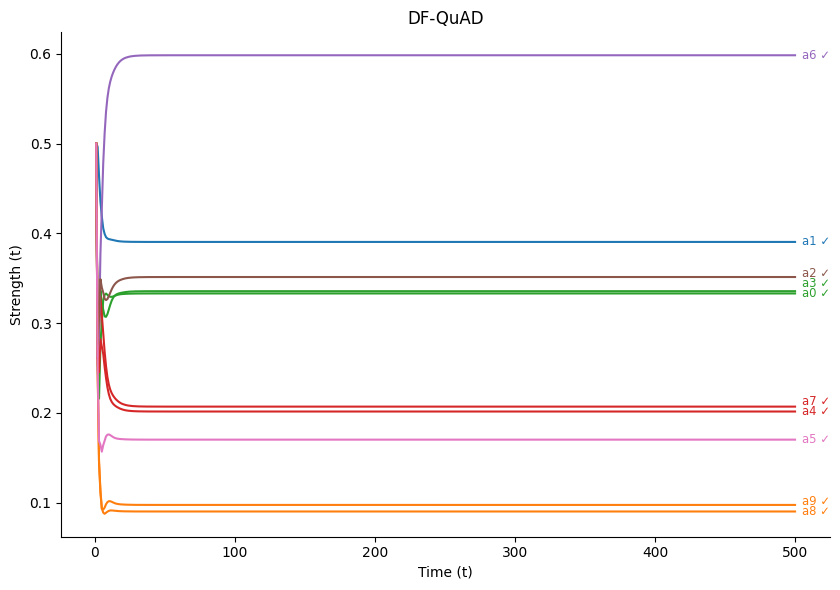

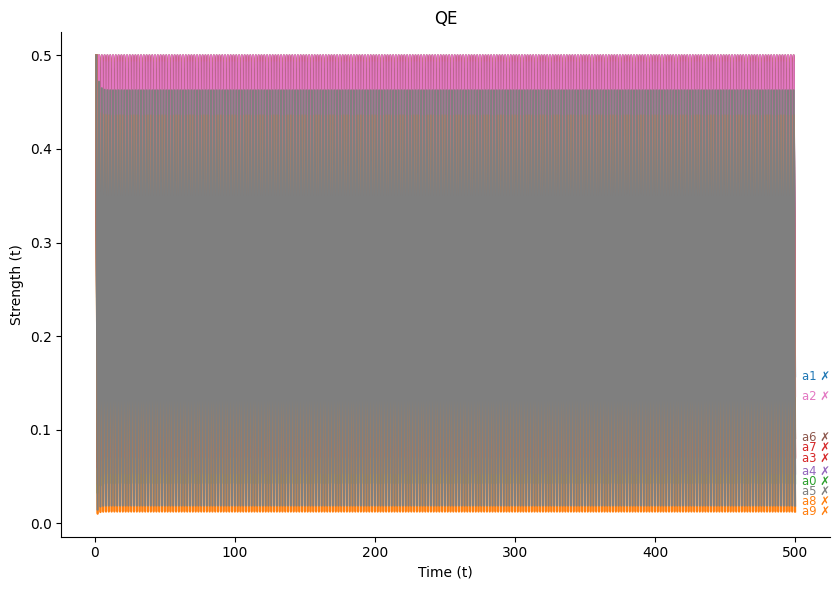

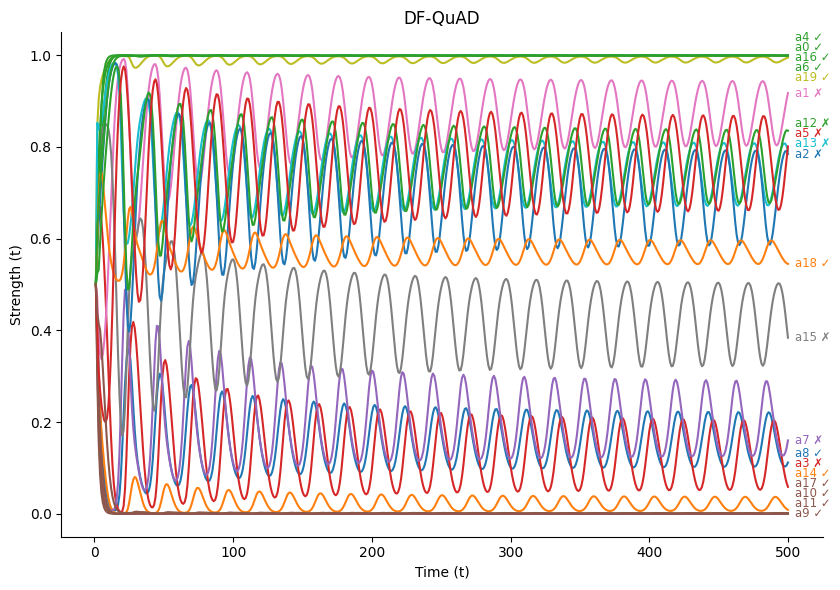

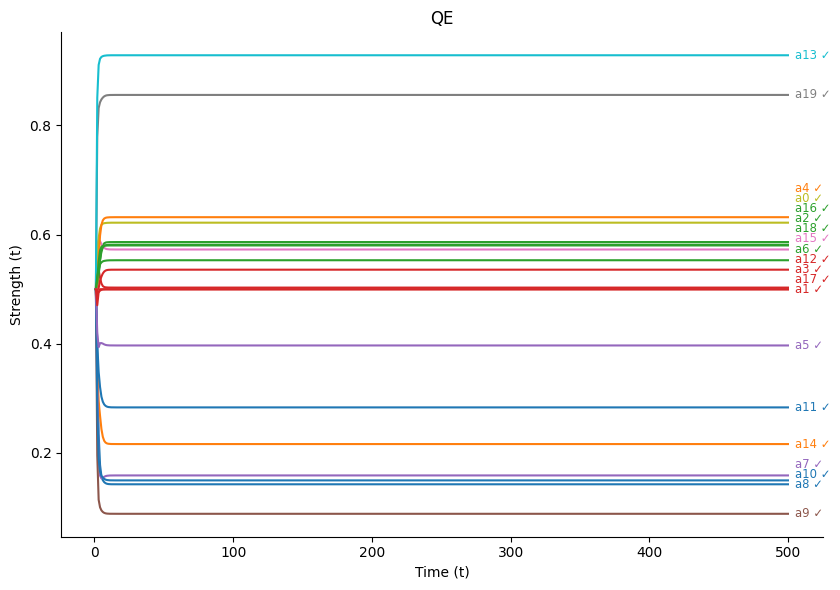

In [4]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetSumAggregation import SetSumAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

EPSILON = 1e-2
DELTA   = 5
VERBOSE = False
TIME_STEPS = 500

### Flat
#     ## Both converge    
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r4_b16_1.aba") 
#     ## DF-QuAD converges, QE does not
# # abaf = None
#     ## QE converges, DF-QuAD does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r8_b16_4.aba")
#     ## Both do not converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s40_n0.01_a0.5_r8_b2_2.aba")

# ### Non-flat
#     ## Both converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b16_9.aba")
#     ## DF-QuAD converges, QE does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b2_0.aba") ## DF-QuAD wins
#     ## QE converges, DF-QuAD does not
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s60_n0.2_a0.5_r2_b4_7.aba")
#     ## Both do not converge
# abaf = ABAF(path="../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b8_7.aba") 

# paths_to_plot = [
#     ## Flat
#     ### Both converge
#     "../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r4_b16_1.aba",
#     ### QE converges, DF-QuAD does not
#     "../data_generation/abaf/nf_atm_s20_n0.01_a0.5_r8_b16_4.aba",
#     ### Both do not converge
#     "../data_generation/abaf/nf_atm_s40_n0.01_a0.5_r8_b2_2.aba",
#     ## Non-flat
#     ### Both converge
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b16_9.aba",
#     ### DF-QuAD converges, QE does not
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r4_b2_0.aba",
#     ### QE converges, DF-QuAD does not
#     "../data_generation/abaf/nf_atm_s60_n0.2_a0.5_r2_b4_7.aba",
#     ### Both do not converge
#     "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b8_7.aba"
# ]

paths_to_plot = [
    "../data_generation/abaf/nf_atm_s20_n0.1_a0.5_r8_b2_7.aba",
    "../data_generation/abaf/nf_atm_s40_n0.2_a0.5_r2_b4_3.aba",
]


for path in paths_to_plot:

    abaf = ABAF(path=path)

    print(abaf)
    print("Flat:", not abaf.non_flat)

    print(f"Number of Assumptions: {len(abaf.assumptions)}")
    print(f"Number of Rules: {len(abaf.rules)}")

    bsaf = abaf.to_bsaf()

    print(bsaf)

    model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                            influence=LinearInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation())

    model.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model, delta=DELTA, epsilon=EPSILON,
                title="DF-QuAD", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)  
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"DF-QuAD - Proportion of converged assumptions: {prop_conv:.1%}")

    if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("DF-QuAD - All assumptions have stabilized in the last 5 steps.")
    else:
        print("DF-QuAD - Some are still oscillating or drifting.")
        print(f"DF-QuAD - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


    model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                            influence=QuadraticMaximumInfluence(conservativeness=1), 
                            set_aggregation=SetProductAggregation())

    model2.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model2, delta=DELTA, epsilon=EPSILON,
                title="QE", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"QE - Proportion of converged assumptions: {prop_conv:.1%}")


    if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("QE - All assumptions have stabilized in the last 5 steps.")
    else:
        print("QE - Some are still oscillating or drifting.")
        print(f"QE - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


In [5]:
import pickle
import random
from pathlib import Path
from collections import defaultdict

# ─── 1) Load merged results ───────────────────────────────────────────
with open("../convergence_results_to10m_nf_atm_e2_d5_s50_setmin.pkl", "rb") as pf:
    runs = pickle.load(pf)

# ─── 2) Bucket runs by file ───────────────────────────────────────────
by_file = defaultdict(dict)
for r in runs:
    is_non_flat = bool(r.get("non_flat", False))
    by_file[r["file"]][r["model"]] = {
        "converged": bool(r.get("global_converged", False)),
        "prop":      r.get("prop_converged", 0.0),
        "non_flat":  is_non_flat,
        "timeout":   bool(r.get("timeout", False))
    }

# ─── 3) Classify each file into categories ────────────────────────────
cats = {
    "flat":     {"both": [], "DF_only": [], "QE_only": [], "neither": []},
    "nonflat":  {"both": [], "DF_only": [], "QE_only": [], "neither": []},
}

for fname, recs in by_file.items():
    # only consider files where we have both runs
    if "DF-QuAD" not in recs or "QE" not in recs:
        continue

    dfc = recs["DF-QuAD"]["converged"]
    qec = recs["QE"]["converged"]
    dfto = recs["DF-QuAD"]["timeout"] if "timeout" in recs["DF-QuAD"] else False
    if dfto:
        continue

    flatness = "nonflat" if recs["DF-QuAD"]["non_flat"]==True else "flat"

    if dfc and qec:
        cats[flatness]["both"].append(fname)
    elif dfc and not qec:
        cats[flatness]["DF_only"].append(fname)
    elif qec and not dfc:
        cats[flatness]["QE_only"].append(fname)
    else:
        cats[flatness]["neither"].append(fname)

# ─── 4) Sample up to 5 from each ──────────────────────────────────────
random.seed(42)
for flatness in ("flat", "nonflat"):
    print(f"\n─── {flatness.upper()} INSTANCES ───")
    for cat in ("both", "DF_only", "QE_only", "neither"):
        lst = cats[flatness][cat]
        sample = random.sample(lst, min(5, len(lst)))
        print(f"{cat:8s} ({len(lst)} files): {sample}")



─── FLAT INSTANCES ───
both     (441 files): ['nf_atm_s40_n0.01_a0.5_r8_b4_7.aba', 'nf_atm_s20_n0.01_a0.5_r4_b2_7.aba', 'nf_atm_s20_n0.01_a0.5_r2_b2_2.aba', 'nf_atm_s60_n0.01_a0.5_r4_b16_3.aba', 'nf_atm_s20_n0.05_a0.5_r2_b4_6.aba']
DF_only  (29 files): ['nf_atm_s20_n0.05_a0.5_r8_b4_5.aba', 'nf_atm_s20_n0.01_a0.5_r8_b8_6.aba', 'nf_atm_s60_n0.01_a0.5_r8_b16_6.aba', 'nf_atm_s20_n0.01_a0.5_r8_b8_5.aba', 'nf_atm_s60_n0.01_a0.5_r8_b16_2.aba']
QE_only  (9 files): ['nf_atm_s60_n0.01_a0.5_r8_b4_4.aba', 'nf_atm_s20_n0.05_a0.5_r8_b4_6.aba', 'nf_atm_s60_n0.01_a0.5_r2_b4_3.aba', 'nf_atm_s60_n0.01_a0.5_r2_b16_1.aba', 'nf_atm_s20_n0.01_a0.5_r8_b4_6.aba']
neither  (1 files): ['nf_atm_s60_n0.01_a0.5_r8_b8_5.aba']

─── NONFLAT INSTANCES ───
both     (463 files): ['nf_atm_s20_n0.1_a0.5_r4_b2_6.aba', 'nf_atm_s20_n0.2_a0.5_r4_b2_6.aba', 'nf_atm_s20_n0.2_a0.5_r4_b4_6.aba', 'nf_atm_s40_n0.1_a0.5_r8_b2_9.aba', 'nf_atm_s60_n0.05_a0.5_r2_b16_9.aba']
DF_only  (306 files): ['nf_atm_s20_n0.1_a0.5_r4_b8_7.aba', 'n

ABAF(Assumptions=[a0,a1,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2,a3,a4,a5,a6,a7,a8,a9], Rules=[r1[0.5]: s0 :- a17, a7, a8, a12.,r2[0.5]: s0 :- a17, a18, a4, a11, a10, a6, a16, a12.,r3[0.5]: s0 :- a3.,r4[0.5]: s1 :- a1, a9, a5, a15, a11.,r5[0.5]: s2 :- a17, a1, a14, a18, a5, a15, a0, a6.,r6[0.5]: s2 :- a17, a5.,r7[0.5]: s2 :- a1, a18, a8, a13, a7, a11, a0, a6.,r8[0.5]: s2 :- a14, a11, a18.,r9[0.5]: s2 :- a14, a8, a13, a15, a0, a3, a16, a12.,r10[0.5]: s2 :- a15.,r11[0.5]: s3 :- a17, a14, a13, a10, a0.,r12[0.5]: s3 :- a19, a18.,r13[0.5]: s4 :- a1, a18, a15, a7, a6.,r14[0.5]: s4 :- a17, a14, a9, a8, a19, a6.,r15[0.5]: s4 :- a14, a9, a8, a13, a15, a4.,r16[0.5]: s4 :- a3, a14, a9.,r17[0.5]: s4 :- a5.,r18[0.5]: s4 :- a17, a9, a18, a15, a2, a11, a16.,r19[0.5]: s4 :- a17, a14, a8, a15, a2, a10, a0, a12.,r20[0.5]: s5 :- a17, a18, a8, a7, a10, a19, a12.,r21[0.5]: s5 :- a18, a15, a2, a10, a0, a3, a16.,r22[0.5]: s5 :- a17, a1, a8, a13, a15, a6, a12.,r23[0.5]: s5 :- a1, a8, a10, a19, a16, a12.,r24

Analysing rules: 100%|██████████| 87/87 [00:00<00:00, 56776.79it/s]

0.02s to build 418 arguments

Support: {a0} -> a0 
Attack:  {a11,a12,a17,a18,a19,a3,a8,a9} -> a0 
Attack:  {a10,a11,a12,a16,a17,a18,a4,a6} -> a0 
Attack:  {a0,a11,a12,a14,a17,a18,a19,a3,a5,a8,a9} -> a0 
Attack:  {a12,a17,a7,a8} -> a0 
Attack:  {a0,a12,a15,a16,a17,a3,a4,a8,a9} -> a0 
Attack:  {a0,a11,a12,a14,a15,a16,a17,a18,a3,a4,a5,a8,a9} -> a0 
Attack:  {a12,a17,a18,a19,a3,a8,a9} -> a0 
Attack:  {a0,a11,a12,a17,a8} -> a0 
Attack:  {a3} -> a0 
Attack:  {a0,a11,a12,a15,a16,a17,a3,a4,a8,a9} -> a0 
Attack:  {a11,a12,a17,a7,a8} -> a0 
Attack:  {a0,a11,a12,a14,a17,a18,a3,a5,a7,a8,a9} -> a0 
Attack:  {a0,a12,a17,a8} -> a0 
Attack:  {a0,a11,a12,a14,a17,a18,a3,a5,a8,a9} -> a0 
Support: {a1} -> a1 
Attack:  {a1,a11,a15,a5,a9} -> a1 
Support: {a10} -> a10 
Attack:  {a5} -> a10 
Attack:  {a0,a12,a17,a2,a3,a9} -> a10 
Attack:  {a15} -> a10 
Support: {a11} -> a11 
Attack:  {a1,a10,a13,a15,a17} -> a11 
Attack:  {a0,a10,a11,a12,a13,a14,a15,a17,a18,a19,a3,a5,a6,a9} -> a11 
Attack:  {a0,a10,a11,a12,a13

{'a19': True, 'a2': True, 'a18': True, 'a17': True, 'a4': True, 'a9': True, 'a16': True, 'a5': True, 'a13': True, 'a7': True, 'a0': True, 'a14': True, 'a1': True, 'a15': True, 'a12': True, 'a3': True, 'a8': True, 'a6': True, 'a10': True, 'a11': True}
DF-QuAD - Proportion of converged assumptions: 100.0%
DF-QuAD - All assumptions have stabilized in the last 5 steps.
{'a19': False, 'a2': False, 'a18': False, 'a17': False, 'a4': False, 'a9': False, 'a16': False, 'a5': False, 'a13': False, 'a7': False, 'a0': False, 'a14': False, 'a1': False, 'a15': False, 'a12': False, 'a3': False, 'a8': False, 'a6': False, 'a10': False, 'a11': False}
QE - Proportion of converged assumptions: 0.0%
QE - Some are still oscillating or drifting.
QE - The assumptions that are not converged are: ['a19', 'a2', 'a18', 'a17', 'a4', 'a9', 'a16', 'a5', 'a13', 'a7', 'a0', 'a14', 'a1', 'a15', 'a12', 'a3', 'a8', 'a6', 'a10', 'a11']
ABAF(Assumptions=[a0,a1,a10,a11,a12,a13,a14,a15,a16,a17,a18,a19,a2,a3,a4,a5,a6,a7,a8,a9],

Analysing rules: 100%|██████████| 37/37 [00:00<00:00, 93039.12it/s]

0.01s to build 100 arguments

Support: {a0} -> a0 
Attack:  {a0,a10,a2} -> a0 
Support: {a1} -> a1 
Attack:  {a1,a3,a9} -> a1 
Attack:  {a3} -> a1 
Support: {a10} -> a10 
Attack:  {a1,a12} -> a10 
Attack:  {a19} -> a10 
Attack:  {a18,a5,a9} -> a10 
Attack:  {a12} -> a10 
Support: {a11} -> a11 
Attack:  {a12} -> a11 
Attack:  {a0} -> a11 
Support: {a12} -> a12 
Attack:  {a14,a19,a6} -> a12 
Attack:  {a1,a12,a14,a6} -> a12 
Attack:  {a1,a16,a7} -> a12 
Attack:  {a12,a14,a6} -> a12 
Attack:  {a16,a7,a8} -> a12 
Support: {a1,a12} -> a13 
Support: {a13} -> a13 
Support: {a19} -> a13 
Support: {a12} -> a13 
Attack:  {a0,a1,a12,a4,a8} -> a13 
Attack:  {a0,a19,a4,a8} -> a13 
Attack:  {a0,a1,a12,a4,a7} -> a13 
Attack:  {a0,a1,a19,a4,a7} -> a13 
Attack:  {a0,a12,a4,a8} -> a13 
Support: {a14} -> a14 
Attack:  {a1,a12,a2} -> a14 
Attack:  {a19,a2} -> a14 
Attack:  {a12,a2} -> a14 
Attack:  {a5} -> a14 
Support: {a1,a12,a14,a18} -> a15 
Support: {a10,a14,a16} -> a15 
Support: {a15} -> a15 
Attack: 

{'a19': True, 'a2': True, 'a18': True, 'a17': True, 'a4': True, 'a9': True, 'a16': True, 'a5': True, 'a13': True, 'a7': True, 'a0': True, 'a14': True, 'a1': True, 'a15': True, 'a12': True, 'a3': True, 'a8': True, 'a6': True, 'a10': True, 'a11': True}
DF-QuAD - Proportion of converged assumptions: 100.0%
DF-QuAD - All assumptions have stabilized in the last 5 steps.
{'a19': True, 'a2': True, 'a18': True, 'a17': True, 'a4': True, 'a9': True, 'a16': True, 'a5': True, 'a13': True, 'a7': True, 'a0': True, 'a14': True, 'a1': True, 'a15': True, 'a12': True, 'a3': True, 'a8': True, 'a6': True, 'a10': True, 'a11': True}
QE - Proportion of converged assumptions: 100.0%
QE - All assumptions have stabilized in the last 5 steps.
ABAF(Assumptions=[a0,a1,a2,a3,a4,a5,a6,a7,a8,a9], Rules=[r1[0.5]: s0 :- a1, a9, a8, a5, a4, a7, a2, a0, a3, a6.,r2[0.5]: s0 :- a4.,r3[0.5]: s0 :- a1, a9, a8, a5, a4, a7, a2, a0, a3, a6.,r4[0.5]: s0 :- a8, a5, a4, a7, a2, a0, a3, a6.,r5[0.5]: s0 :- a9, a8, a7, a2, a0, a3, a6

Analysing rules: 100%|██████████| 48/48 [00:00<00:00, 13246.04it/s]

0.02s to build 134 arguments

Support: {a0} -> a0 
Attack:  {a0,a2,a3,a4,a5,a6,a7,a8,a9} -> a0 
Attack:  {a0,a2,a3,a6,a7,a8,a9} -> a0 
Attack:  {a0,a2,a3,a4,a5,a6,a7,a8} -> a0 
Attack:  {a0,a1,a2,a3,a5,a6,a7,a8,a9} -> a0 
Attack:  {a0,a1,a2,a3,a4,a5,a6,a7,a8,a9} -> a0 
Attack:  {a0,a2,a3,a5,a6,a7,a8,a9} -> a0 
Attack:  {a4} -> a0 
Support: {a5,a6,a7,a8,a9} -> a1 
Support: {a0,a2,a3,a4,a5,a6,a7,a8,a9} -> a1 
Support: {a1} -> a1 
Support: {a0,a3,a4,a5,a6,a7,a8,a9} -> a1 
Support: {a0,a3,a5,a6,a9} -> a1 
Support: {a0,a3,a4,a5,a6,a8,a9} -> a1 
Support: {a1,a6,a7,a8} -> a1 
Support: {a0,a1,a3,a4,a5,a6,a7,a8,a9} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a7,a8,a9} -> a1 
Support: {a0,a2,a3,a4,a5,a6,a8,a9} -> a1 
Support: {a0,a1,a3,a4,a5,a6,a8,a9} -> a1 
Support: {a0,a3,a5,a6,a7,a8,a9} -> a1 
Support: {a0,a1,a2,a3,a4,a5,a6,a8,a9} -> a1 
Support: {a5,a6,a9} -> a1 
Attack:  {a4,a5,a6,a7,a9} -> a1 
Attack:  {a1,a2,a3,a5,a6,a7,a8,a9} -> a1 
Attack:  {a0,a2,a3,a4,a5,a6,a7,a8,a9} -> a1 
Attack:  {a2,a3,

{'a2': True, 'a0': True, 'a4': True, 'a1': True, 'a9': True, 'a3': True, 'a8': True, 'a6': True, 'a5': True, 'a7': True}
DF-QuAD - Proportion of converged assumptions: 100.0%
DF-QuAD - All assumptions have stabilized in the last 5 steps.
{'a2': False, 'a0': False, 'a4': False, 'a1': False, 'a9': False, 'a3': False, 'a8': False, 'a6': False, 'a5': False, 'a7': False}
QE - Proportion of converged assumptions: 0.0%
QE - Some are still oscillating or drifting.
QE - The assumptions that are not converged are: ['a2', 'a0', 'a4', 'a1', 'a9', 'a3', 'a8', 'a6', 'a5', 'a7']


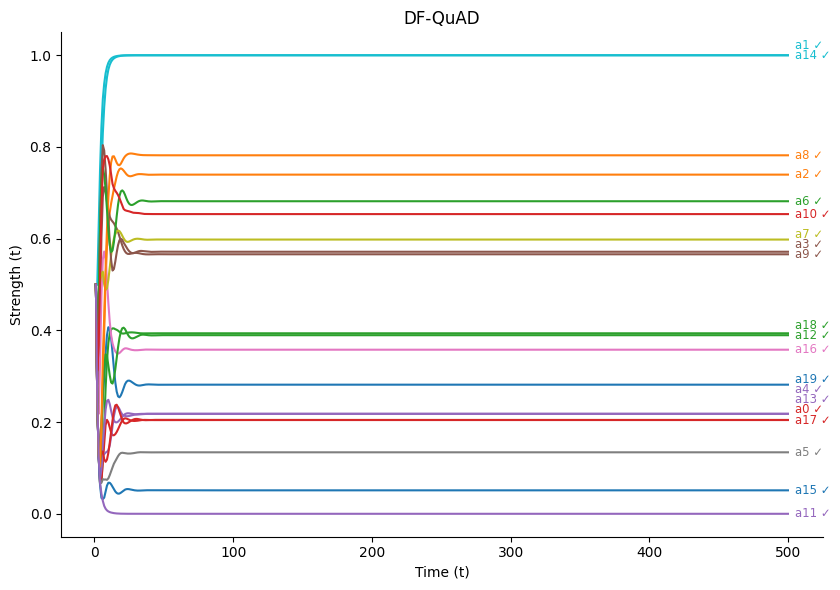

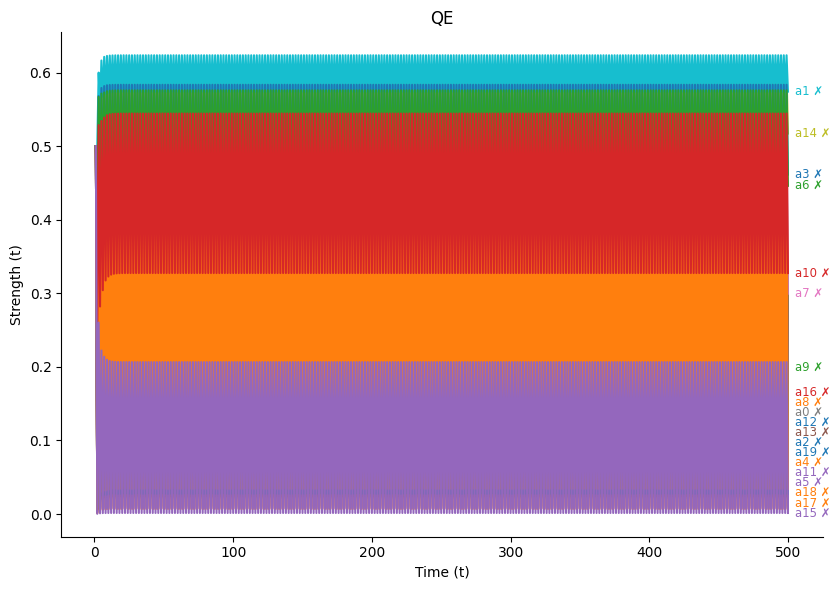

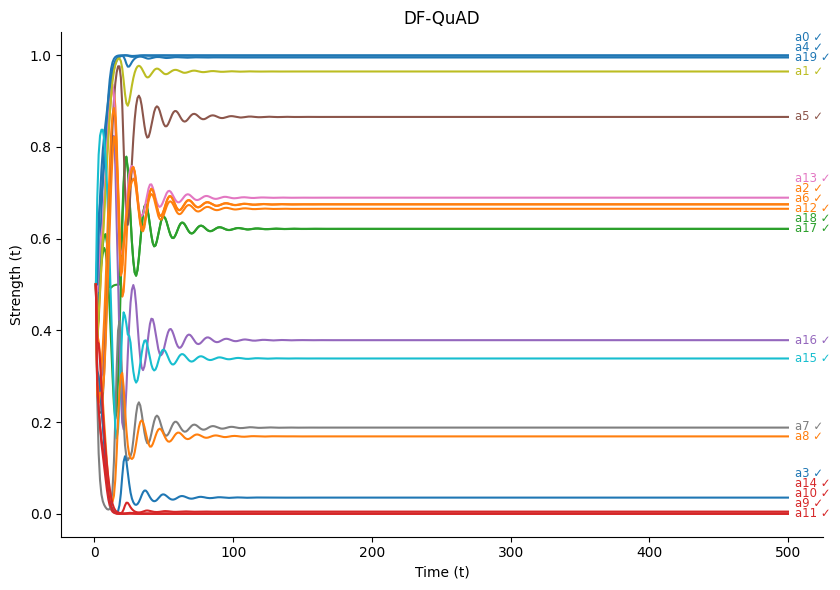

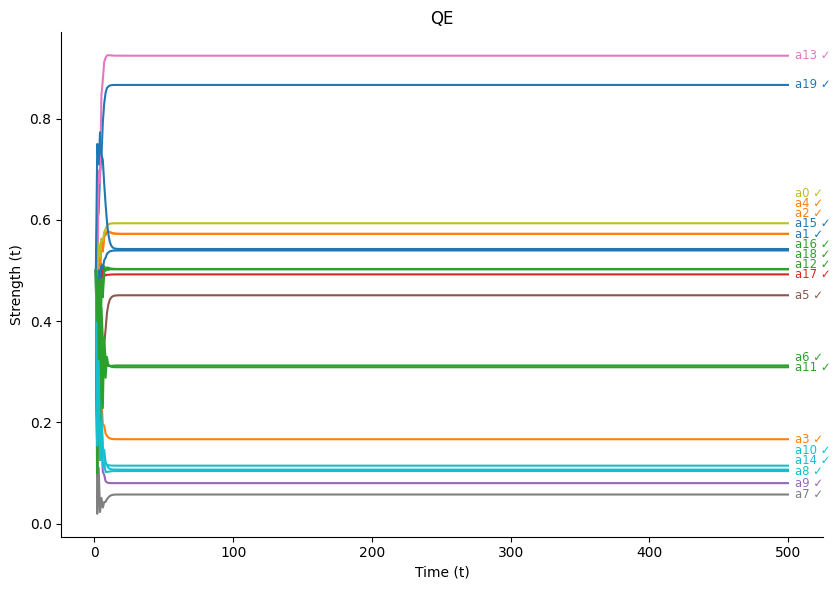

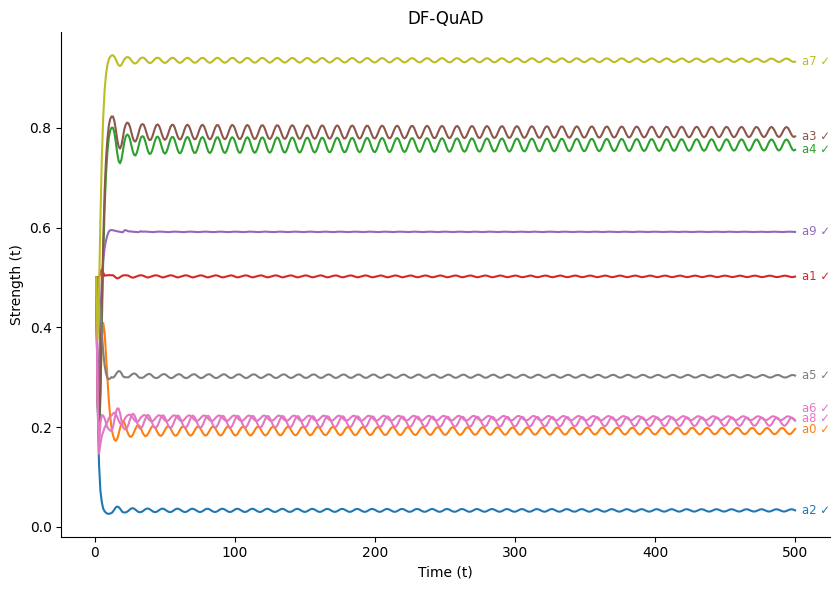

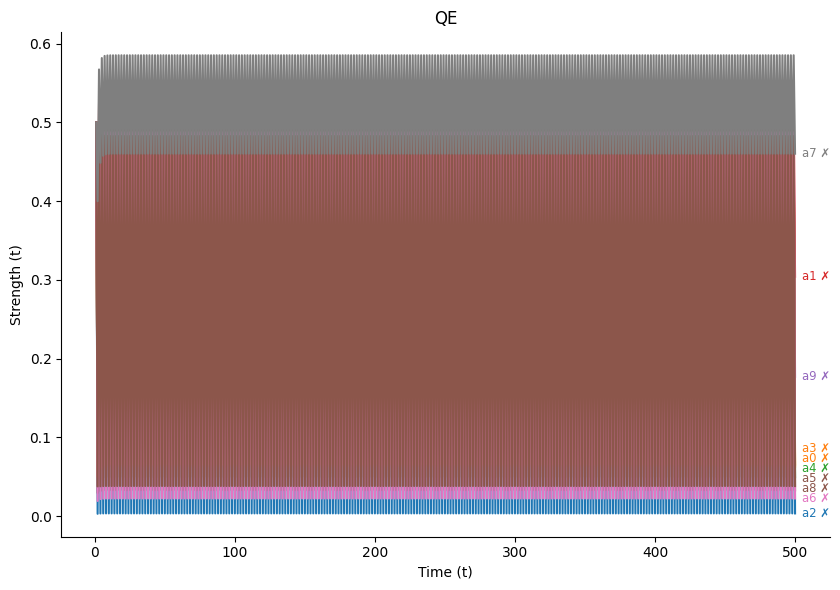

In [65]:
import sys
sys.path.append("../")

from BAG import BAG

from plotting import strengthplot

from ABAF import ABAF
from ABAF.Assumption import Assumption
from BSAF import BSAF
from BSAF.Argument import Argument
from semantics.bsafDiscreteModular import DiscreteModular
from semantics.modular.EulerBasedInfluence import EulerBasedInfluence
from semantics.modular.LinearInfluence import LinearInfluence
from semantics.modular.ProductAggregation import ProductAggregation
from semantics.modular.SetProductAggregation import SetProductAggregation
from semantics.modular.SetMinAggregation import SetMinAggregation
from semantics.modular import SumAggregation
from semantics.modular import QuadraticMaximumInfluence

EPSILON = 1e-2
DELTA   = 5
VERBOSE = False
TIME_STEPS = 500



paths_to_plot = [
    "../data_generation/abaf/nf_atm_s40_n0.05_a0.5_r8_b8_9.aba",
    "../data_generation/abaf/nf_atm_s40_n0.2_a0.5_r2_b4_3.aba",
    "../data_generation/abaf/nf_atm_s20_n0.2_a0.5_r8_b16_5.aba",
]


for path in paths_to_plot:

    abaf = ABAF(path=path)

    print(abaf)
    print("Flat:", not abaf.non_flat)

    print(f"Number of Assumptions: {len(abaf.assumptions)}")
    print(f"Number of Rules: {len(abaf.rules)}")

    bsaf = abaf.to_bsaf()

    print(bsaf)

    model = DiscreteModular(BSAF=bsaf, aggregation=ProductAggregation(), 
                            influence=LinearInfluence(conservativeness=1), 
                            # set_aggregation=SetProductAggregation()
                            set_aggregation=SetMinAggregation())

    model.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model, delta=DELTA, epsilon=EPSILON,
                title="DF-QuAD", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)  
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"DF-QuAD - Proportion of converged assumptions: {prop_conv:.1%}")

    if model.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("DF-QuAD - All assumptions have stabilized in the last 5 steps.")
    else:
        print("DF-QuAD - Some are still oscillating or drifting.")
        print(f"DF-QuAD - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")


    model2 = DiscreteModular(BSAF=bsaf, aggregation=SumAggregation(), 
                            influence=QuadraticMaximumInfluence(conservativeness=1), 
                            set_aggregation=SetMinAggregation())

    model2.solve(TIME_STEPS, generate_plot=True, verbose=VERBOSE)

    strengthplot(model2, delta=DELTA, epsilon=EPSILON,
                title="QE", wide=10, tall=6)

    # check convergence over the last 5 iterations, with ε=1e-3
    per_arg = model2.has_converged(epsilon=EPSILON, last_n=DELTA)
    print(per_arg)
    # e.g. {'a0': True, 'a1': False, ...}
    prop_conv       = (sum(per_arg.values()) / len(per_arg)) if len(per_arg) else 0.0
    print(f"QE - Proportion of converged assumptions: {prop_conv:.1%}")


    if model2.is_globally_converged(epsilon=EPSILON, last_n=DELTA):
        print("QE - All assumptions have stabilized in the last 5 steps.")
    else:
        print("QE - Some are still oscillating or drifting.")
        print(f"QE - The assumptions that are not converged are: {[a for a, b in per_arg.items() if not b]}")
